In [79]:
using DrWatson
@quickactivate
using Revise
using CairoMakie
include("../src/main.jl")

w1_map_plot (generic function with 1 method)

In [126]:
df = get_results();
ldf, rdf = split_results(df);

┌ Info: Scanning folder /Users/zijin/projects/ion_scattering_by_SWD/data/simulations for result files.
└ @ DrWatson /Users/zijin/.julia/packages/DrWatson/8XYbJ/src/result_collection.jl:117
┌ Info: Added 288 entries.
└ @ DrWatson /Users/zijin/.julia/packages/DrWatson/8XYbJ/src/result_collection.jl:193


In [137]:
θs = vals(df, :θ);
βs = vals(df, :β);
vs = vals(df, :v);

In [110]:
func = subset_v(100) ∘ subset_leave ∘ subset_β(βs[2:2:end])

var"#352#354"{Int64}(100) ∘ subset_leave ∘ var"#356#358"{Vector{Float64}}([29.999999999999996, 59.99999999999999, 89.99999999999999])

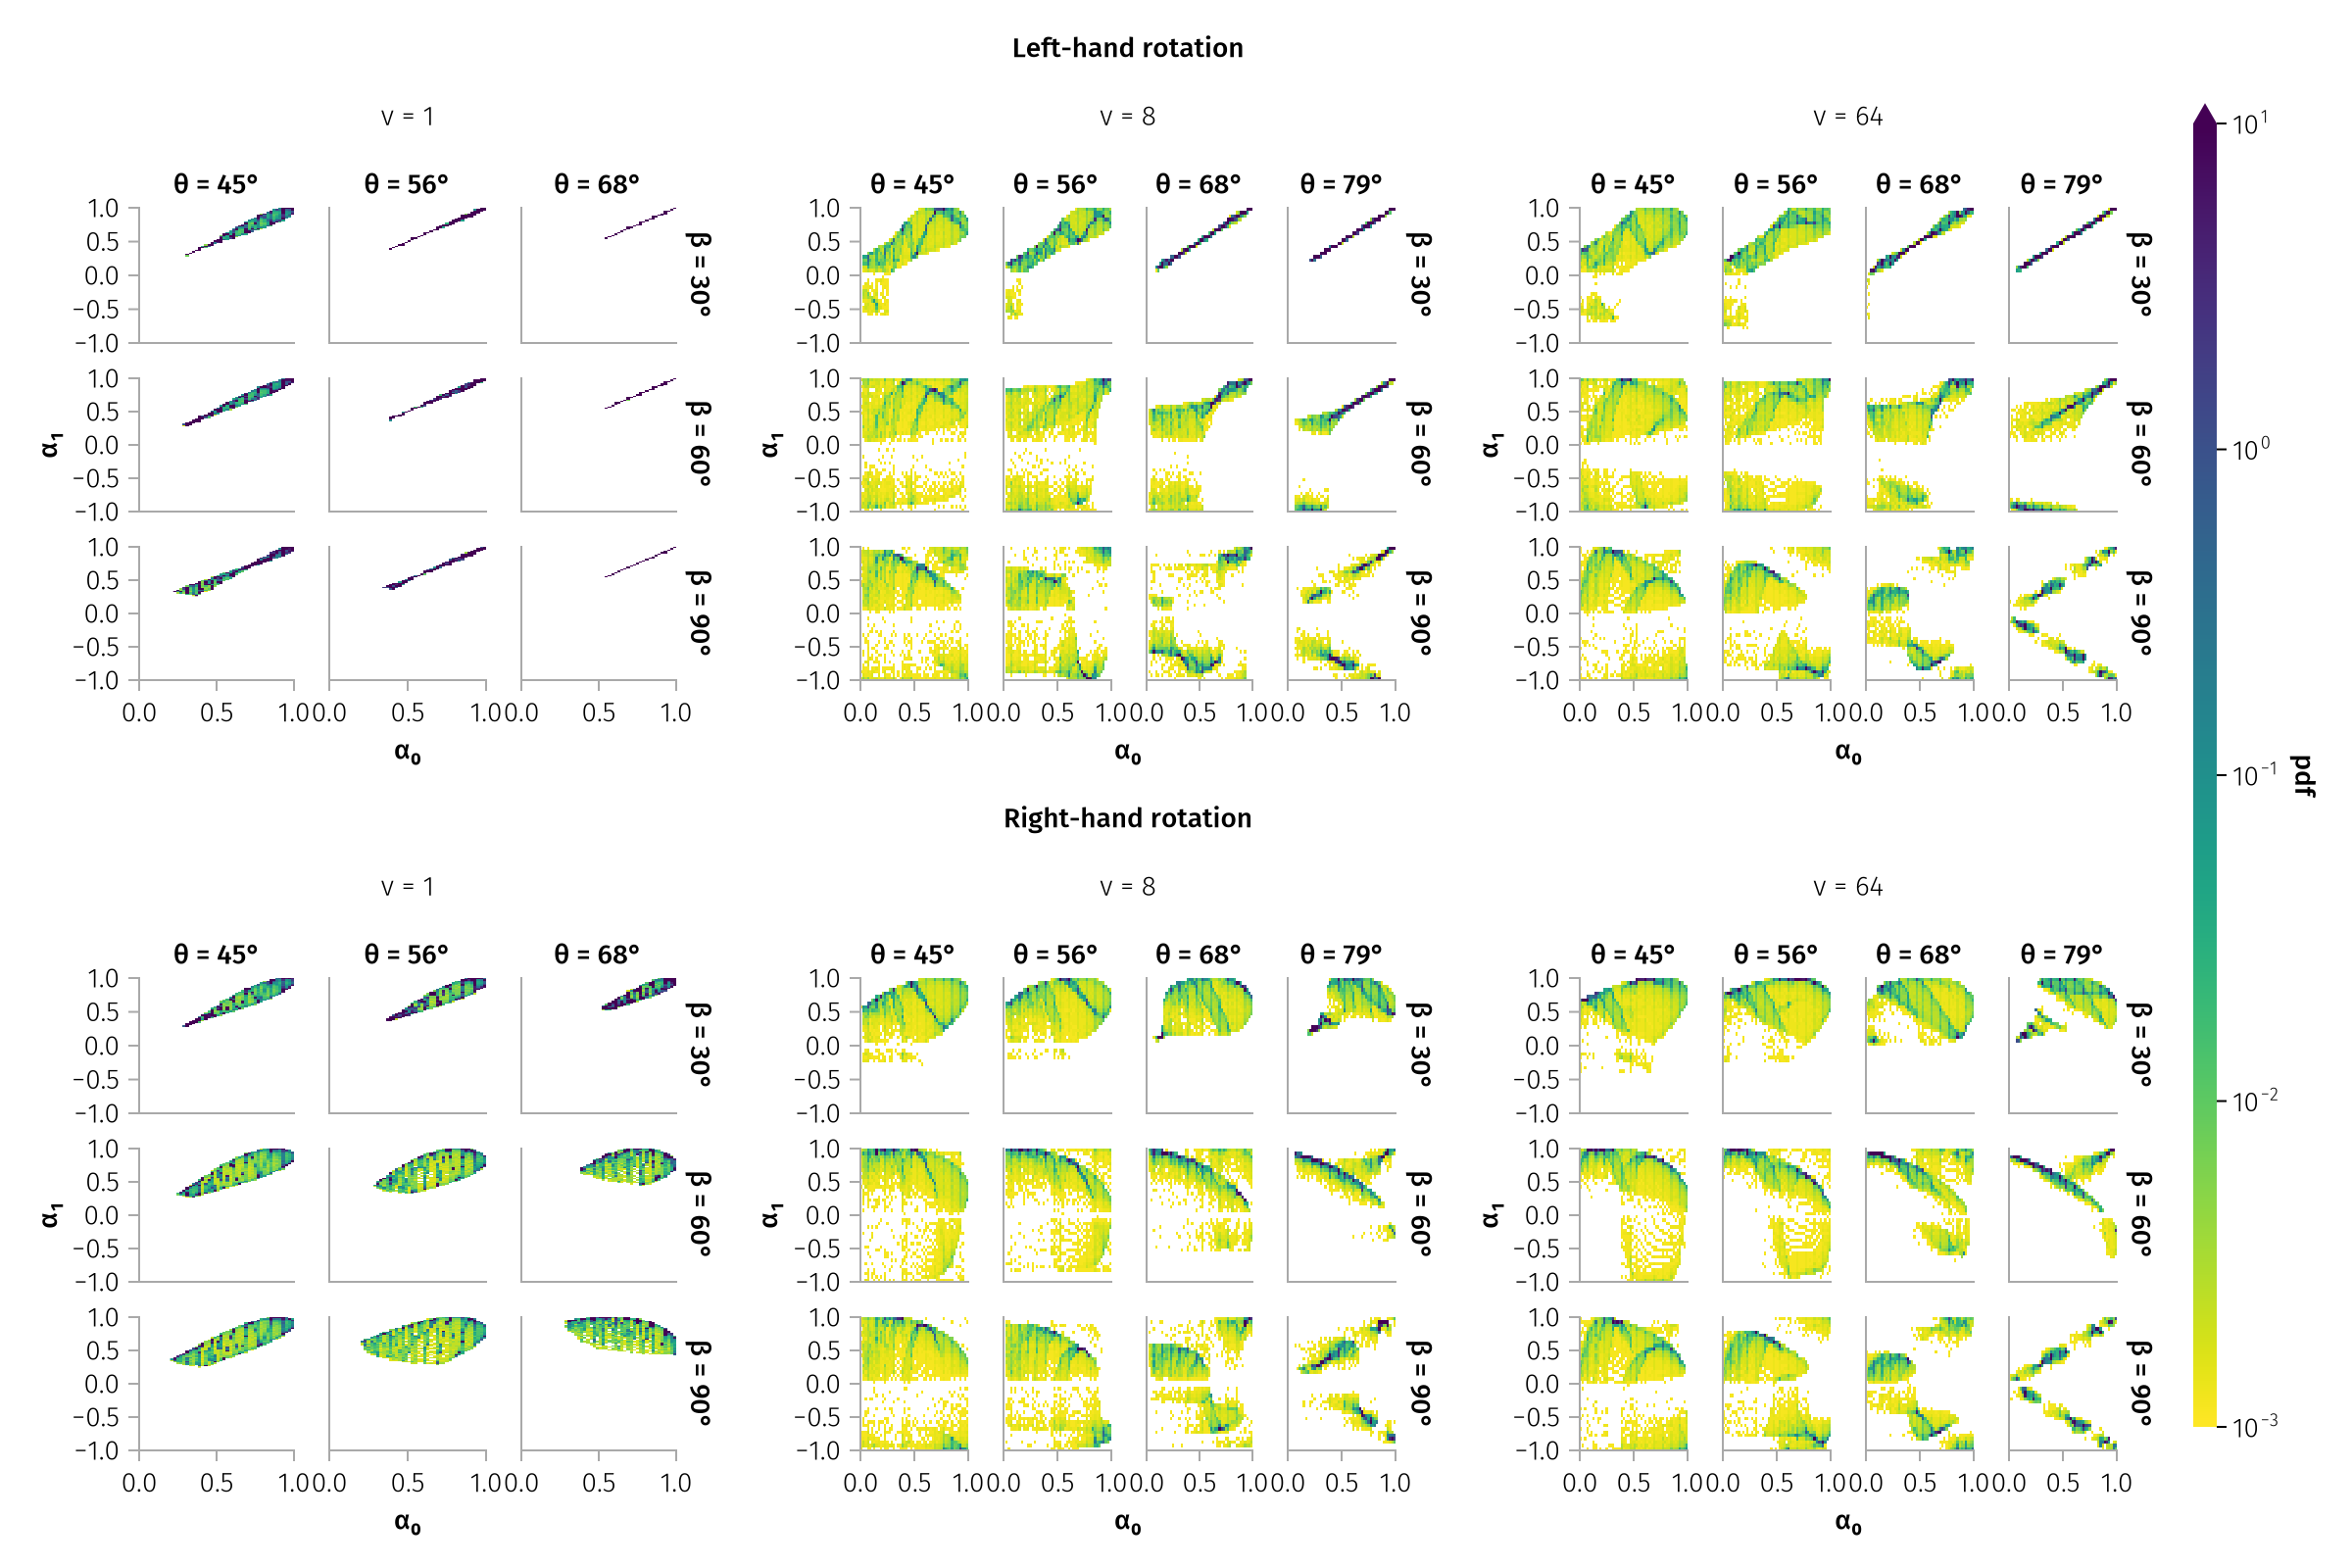

In [139]:
fig = Figure(;size=(1200, 800))

imax = length(vs)
axsl = [fig[1,i] for i in 1:imax]
axsr = [fig[3,i] for i in 1:imax]

pa_pair_plot_by_v!(func(ldf), axsl)
grids = pa_pair_plot_by_v!(func(rdf), axsr)
sign_label(fig)
colorbar_pos = fig[1:end,end+1]
colorbar!(colorbar_pos, grids[1]; scale=log10)
fig

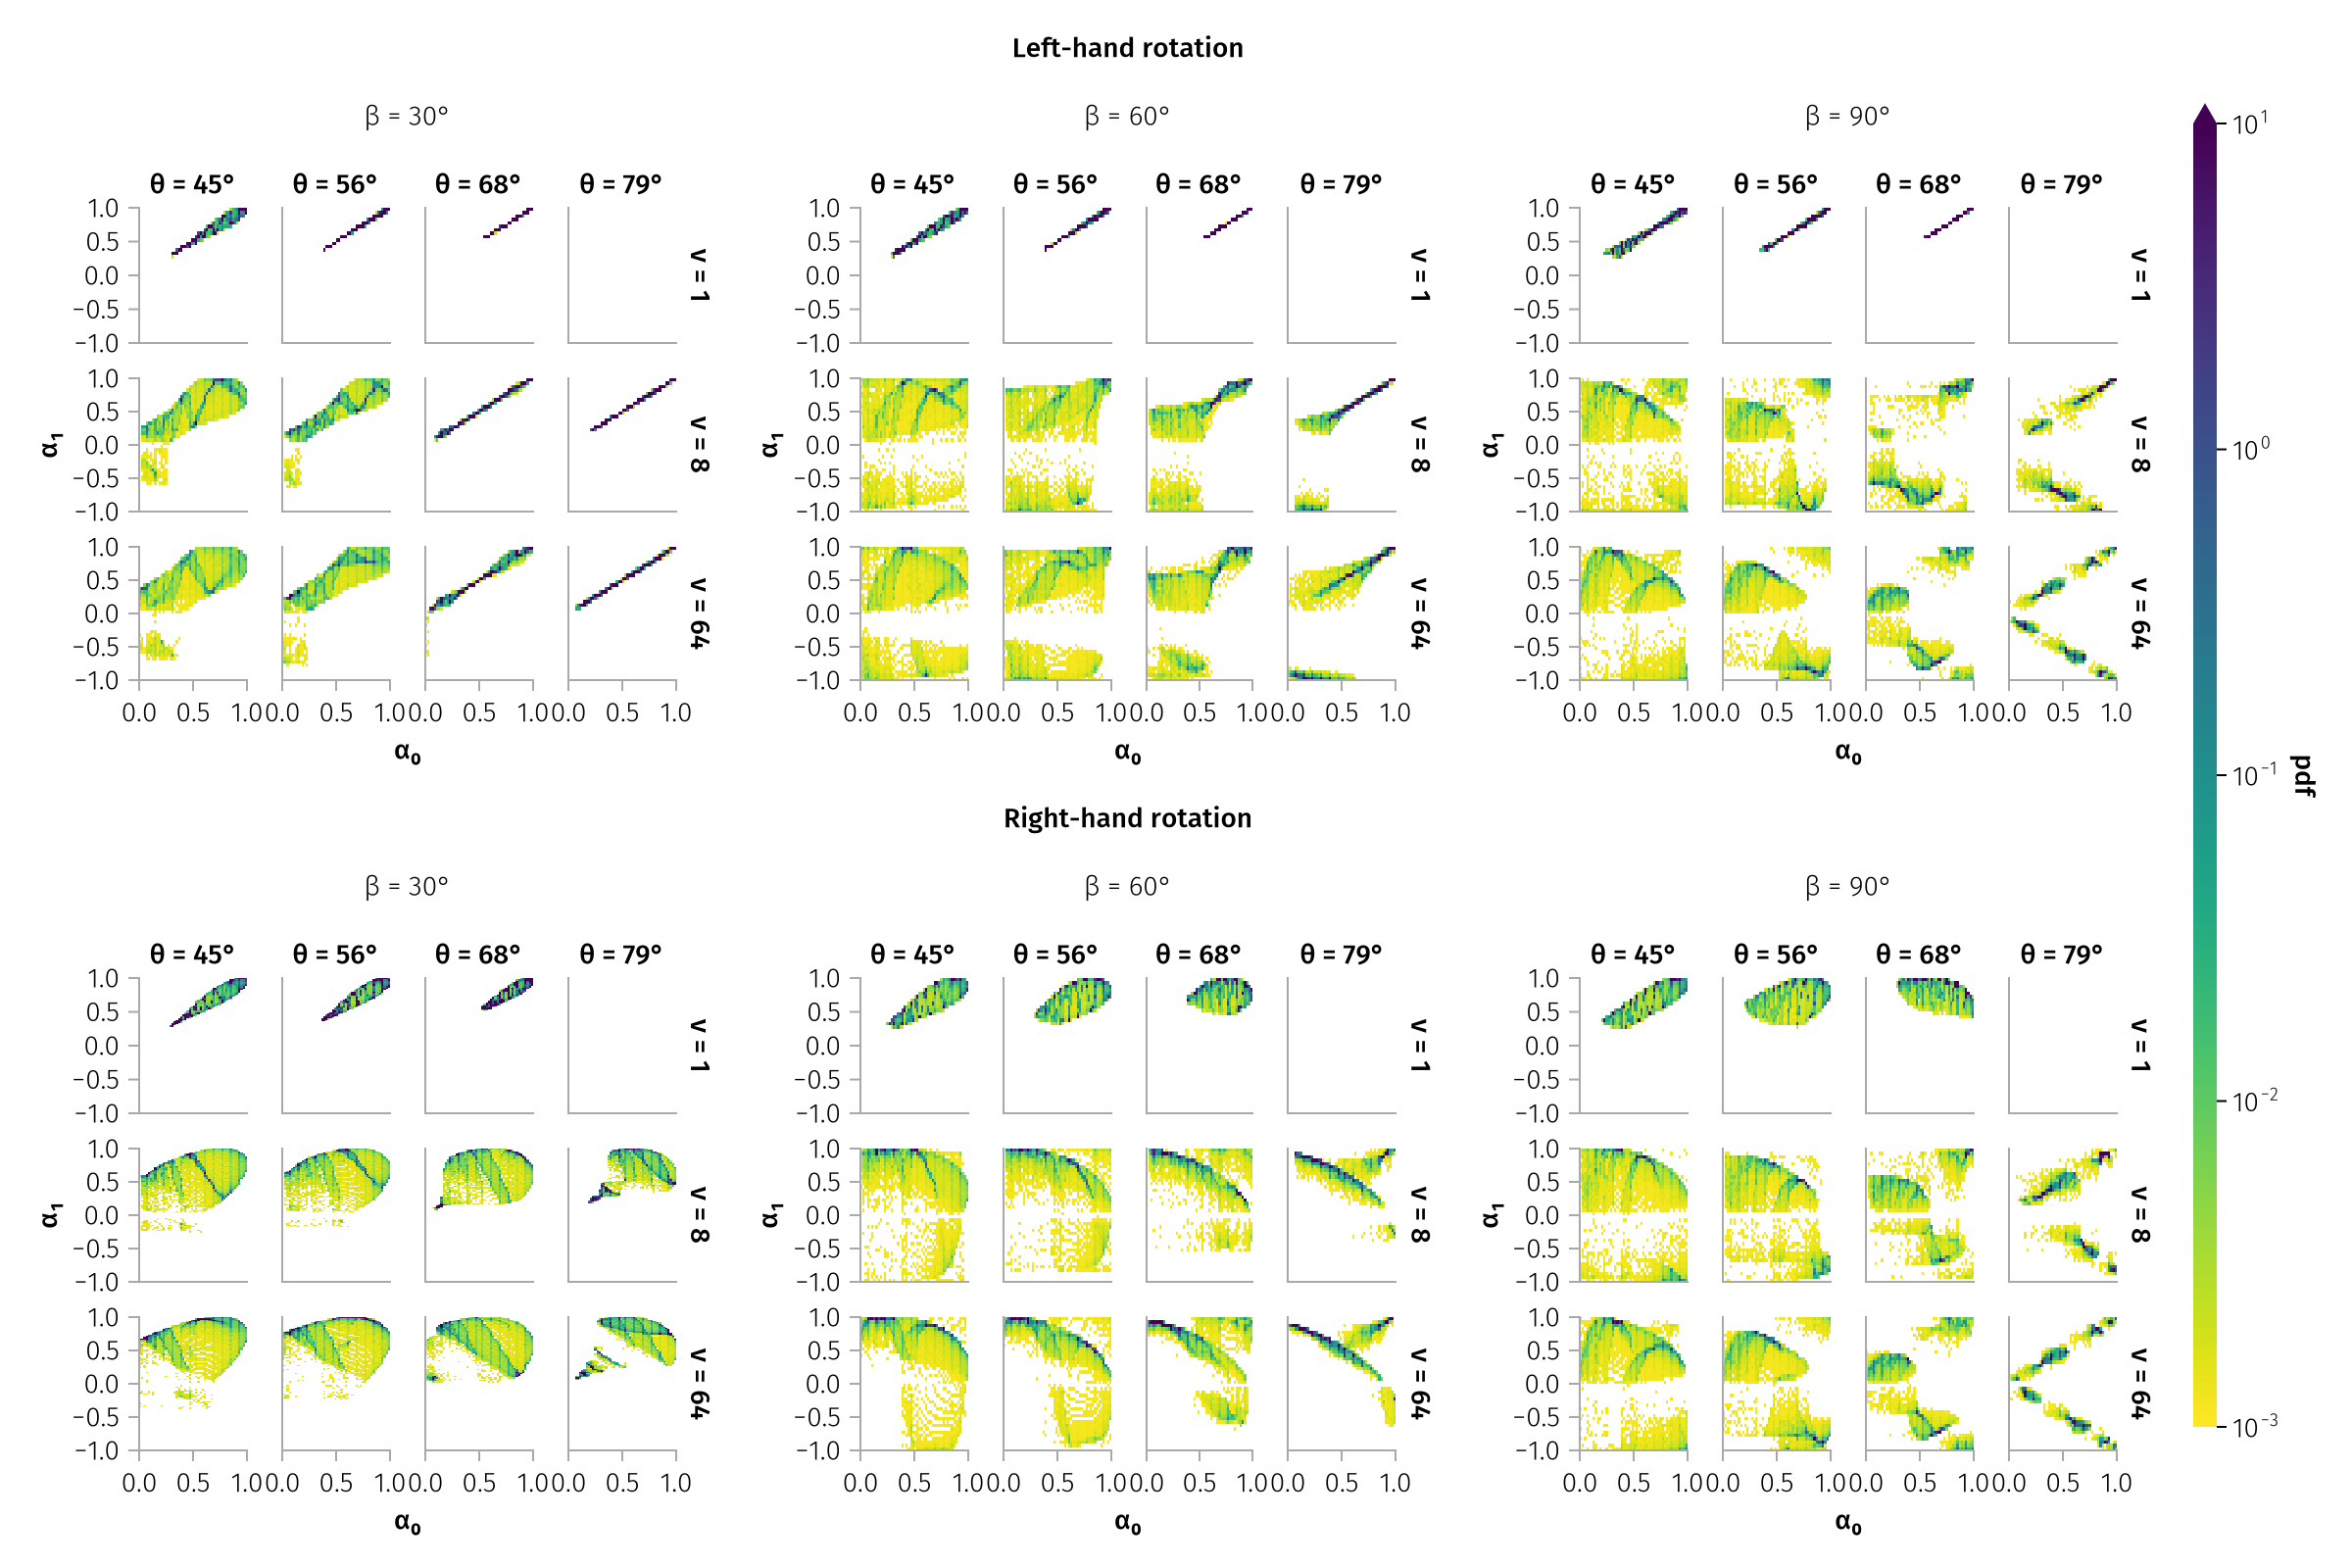

In [140]:
fig = Figure(;size=(1200, 800))

imax = length(βs)
axsl = [fig[1,i] for i in 1:imax]
axsr = [fig[3,i] for i in 1:imax]

pa_pair_plot_by_β!(func(ldf), axsl)
pa_pair_plot_by_β!(func(rdf), axsr)
sign_label(fig)
colorbar_pos = fig[1:end,end+1]
colorbar!(colorbar_pos, grids[1]; scale=log10)
fig

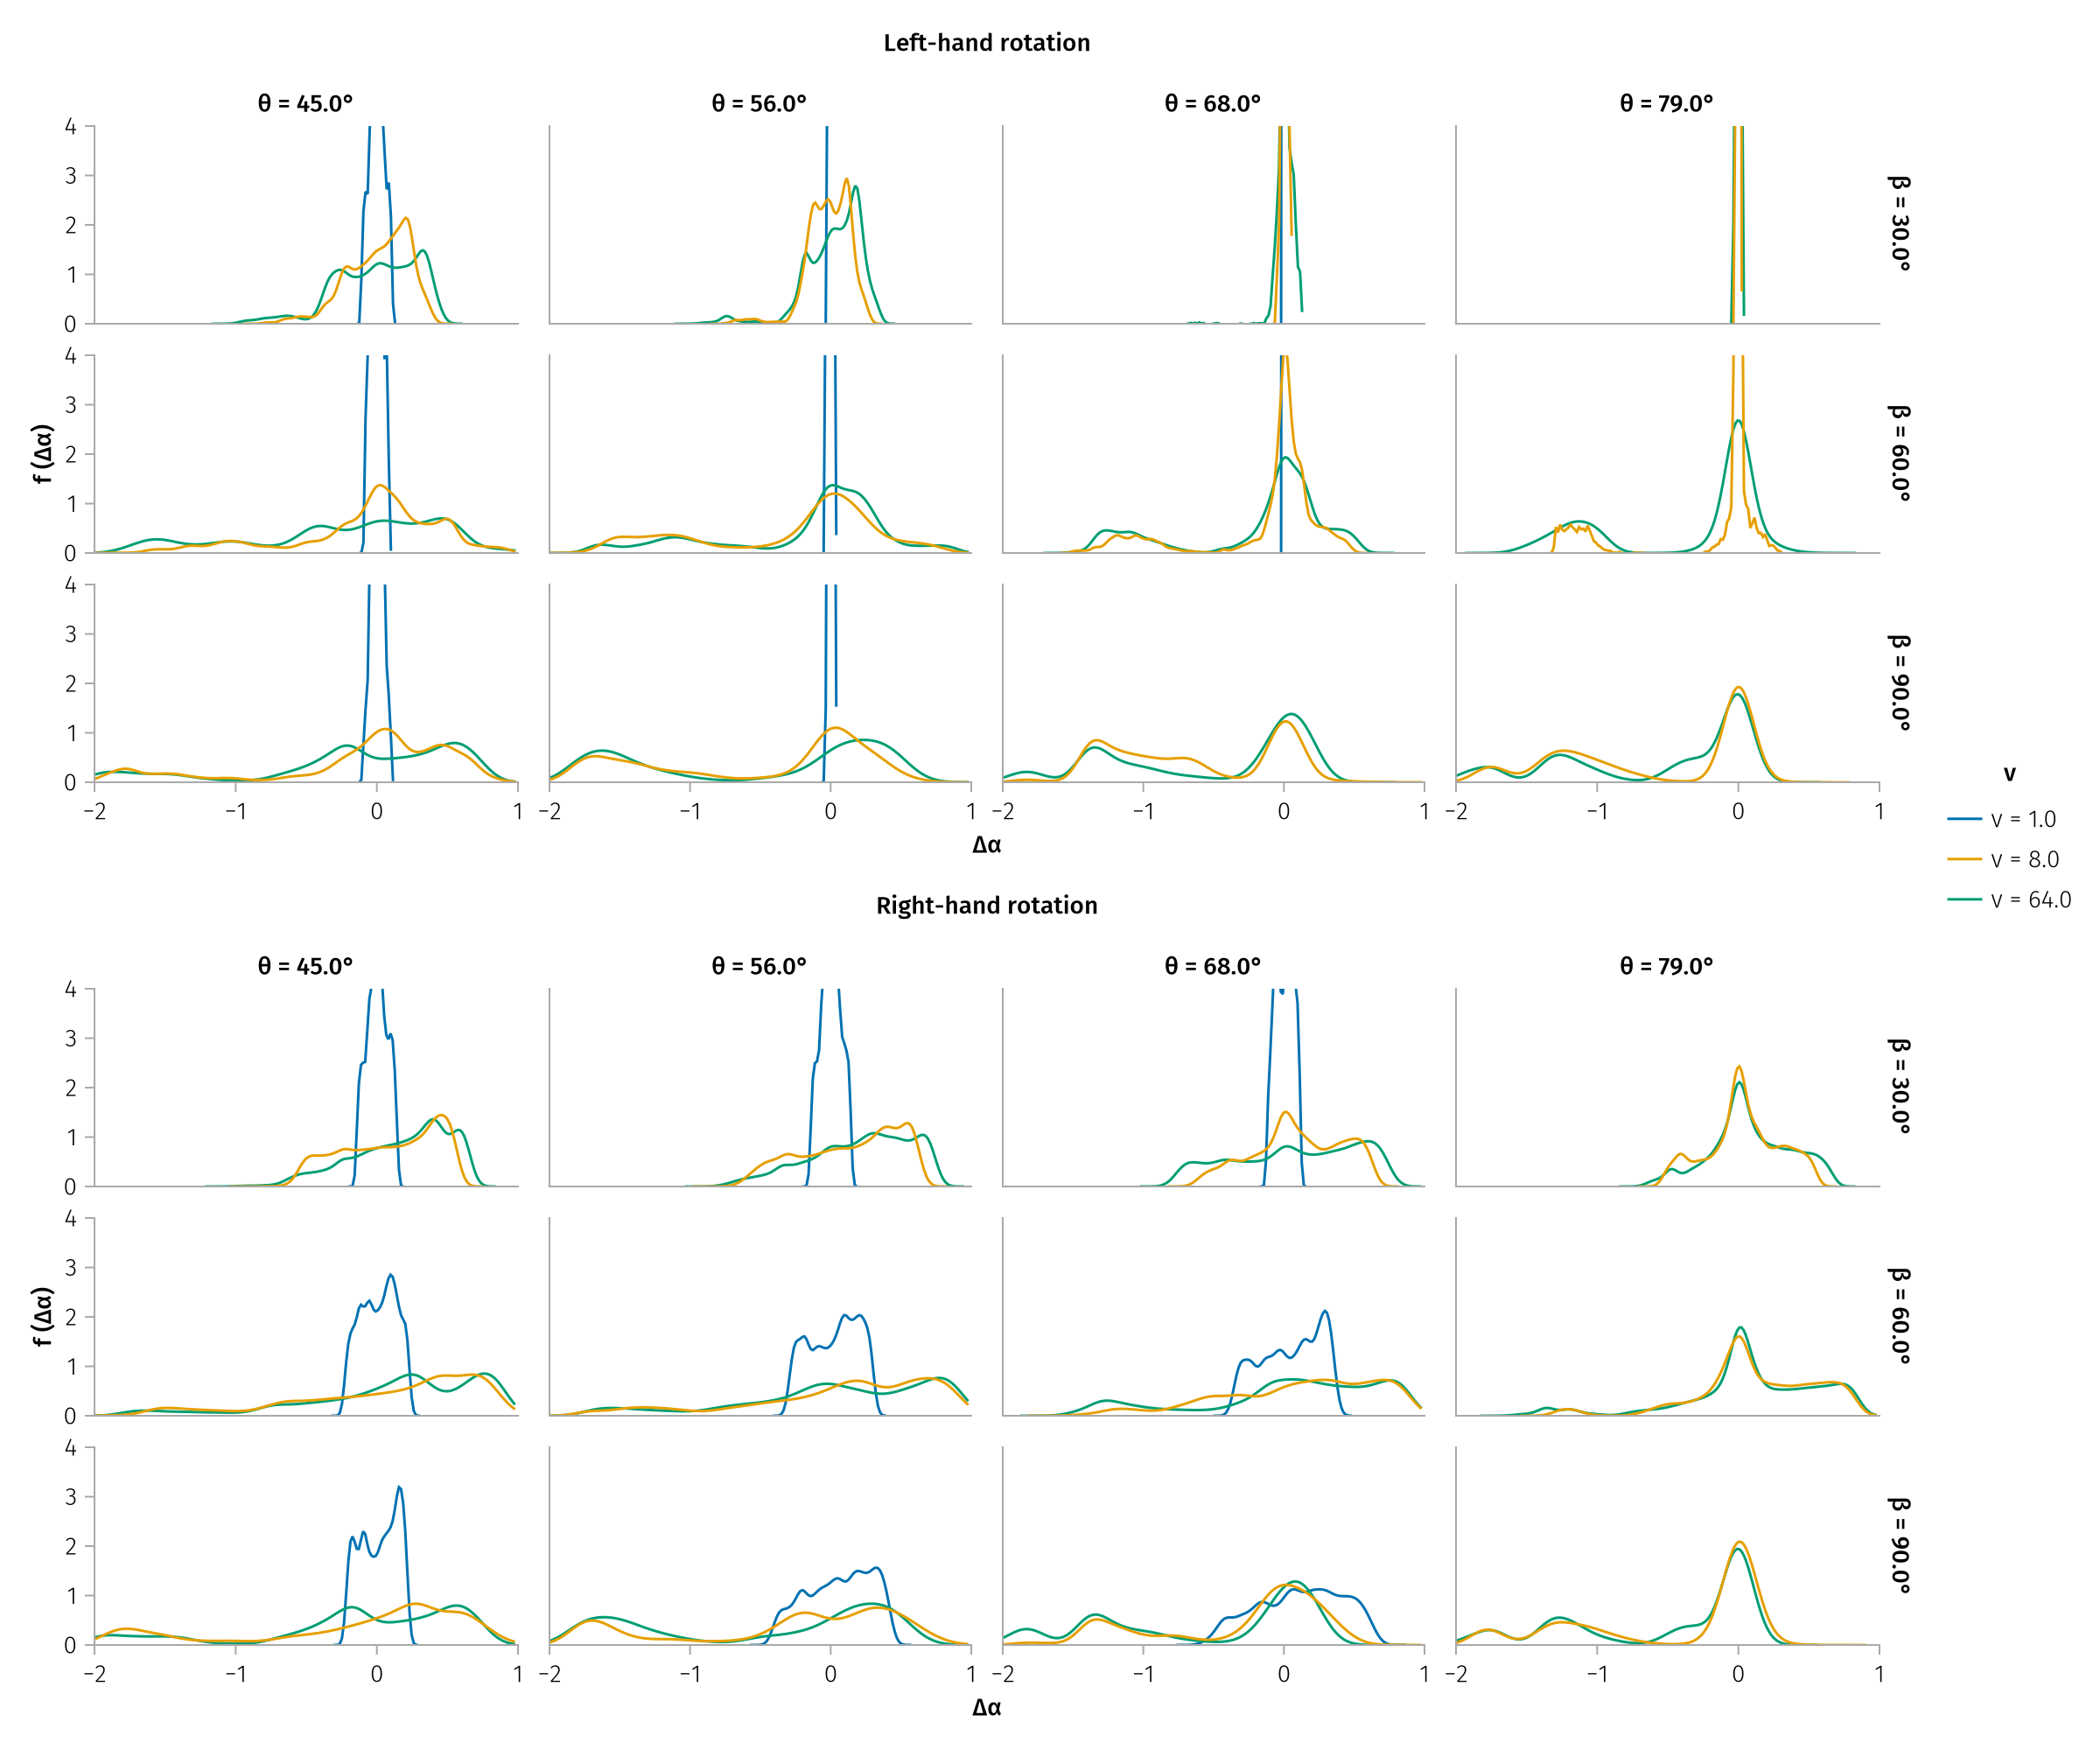

In [128]:
fig = Figure(; size=(1200, 1000,))
gridsl = pa_diff_plot!(fig[1,1], func(ldf))
gridsr = pa_diff_plot!(fig[3,1], func(rdf))
sign_label(fig)
legend!(fig[:,end+1], gridsl)
fig

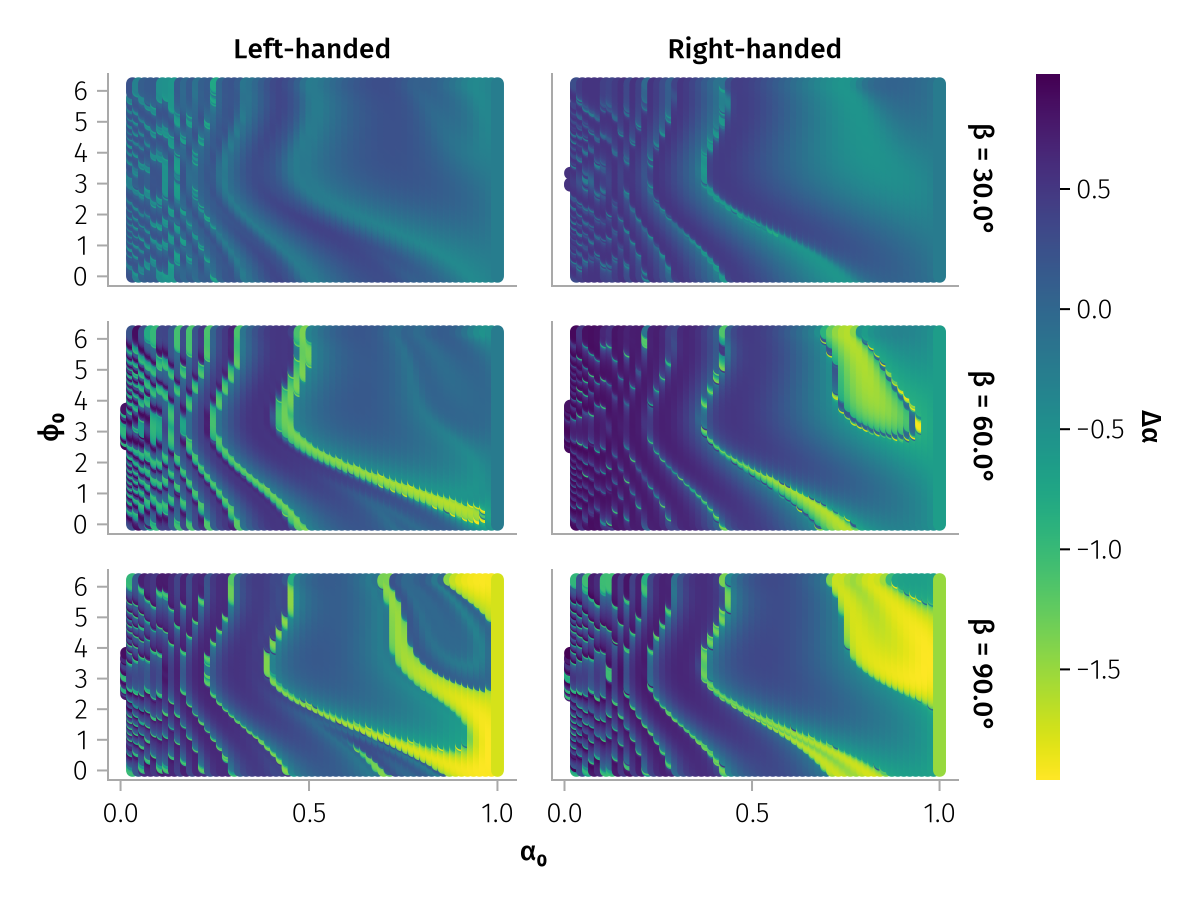

In [132]:
tdf = @subset(func(df), :v .== 8, :θ .== 45);
l = data(tdf) * mapping(col=sign_map,row=β_map)
w1_map_plot(l; color=Δα)

In [ ]:
# Create a layer with faceting for α, β, and v
begin
    using GLMakie
    GLMakie.activate!()
    fg = pa_pair_plot(layer; figure = figure)
end